In [1]:
import pandas as pd 

x = pd.read_csv("dengue_data.csv", index_col = 0)
y = pd.read_csv("dengue_metadata.csv")


In [2]:
#Task 1 exploratory analysis 
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(x.T)
pca_x = pca.transform(x.T)
variance_explained = pca.explained_variance_ratio_
print(variance_explained)



[0.21229208 0.08586268 0.06319544 0.04321934 0.03298041 0.02803353
 0.02201178 0.01988031 0.01893533 0.0173615 ]


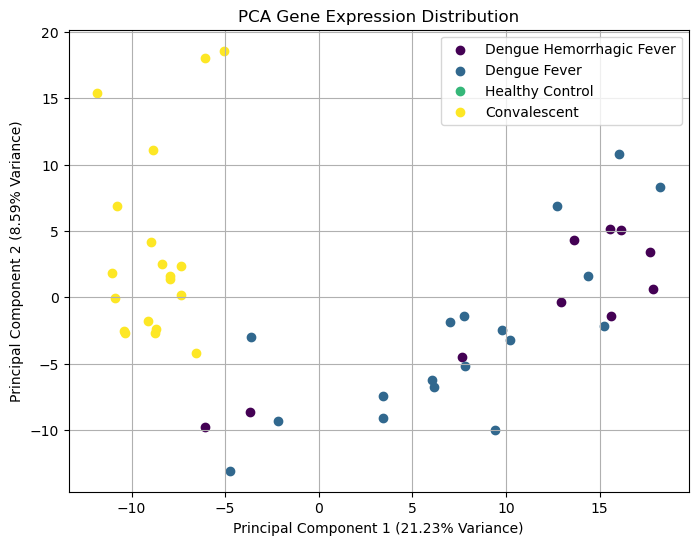

In [3]:
### Task 1 exploratory analysis 


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca_analyzer = PCA(n_components=10)  
transformed_data = pca_analyzer.fit_transform(x.T)  # transpose data so more variable-centric 
# Define the four specific categories you want to plot
target_categories = ['Dengue Hemorrhagic Fever', 'Dengue Fever', 'Healthy Control', 'Convalescent']

plt.figure(figsize=(8, 6))

# Define a color map for the specific categories
category_colors = plt.cm.viridis(np.linspace(0, 1, len(target_categories)))

# Plot each category
for index, category in enumerate(target_categories):
    category_indices = np.where(y == category)[0]
    plt.scatter(
        transformed_data[category_indices, 0], 
        transformed_data[category_indices, 1], 
        label=category,
        color=category_colors[index],
    )

# Add plot title and labels
plt.title('PCA Gene Expression Distribution')
plt.xlabel(f'Principal Component 1 ({pca_analyzer.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca_analyzer.explained_variance_ratio_[1]*100:.2f}% Variance)')

# Add legend and grid
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Task1 exploratory analysis heat
'''Heat map wont be used in assignment'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Transpose the data
transposed_data = x.transpose()

# Create a heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(transposed_data, cmap='viridis')  # Change the colormap as desired

# add labels and title
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.title('Gene Expression Heatmap')



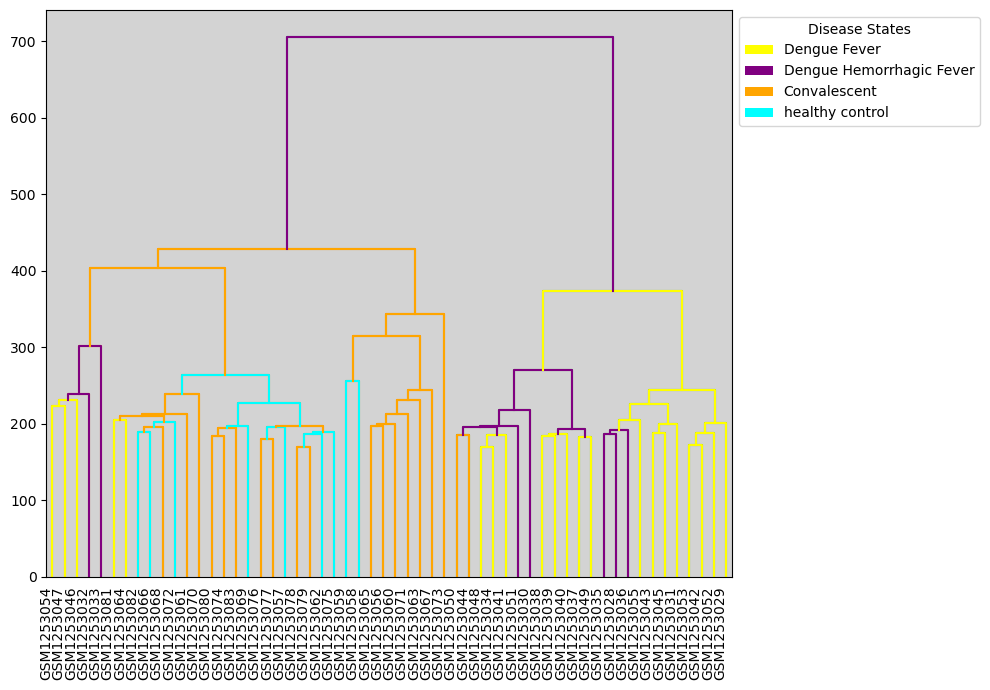

In [4]:
#Task 1 exploratory analysis HCA map 
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler


data_frame_ = pd.read_csv("dengue_data.csv", index_col=0)
metadata_frame_ = pd.read_csv("dengue_metadata.csv")

# transpose and merge data 
transposed_data_ = data_frame_.T
merged_dataset_ = pd.merge(metadata_frame_, transposed_data_, left_on='sample', right_index=True)

# standardise and prepare  the numeric data 
numeric_dataset_ = merged_dataset_.select_dtypes(include=[np.number])
scaler_ = StandardScaler()
scaled_numeric_data_ = scaler_.fit_transform(numeric_dataset_)


hierarchical_linkage_ = linkage(scaled_numeric_data_, method='ward')

color_scheme_ = {
    'Dengue Fever': 'yellow',
    'Dengue Hemorrhagic Fever': 'purple',
    'Convalescent': 'orange',
    'healthy control': 'cyan'
}

# plot dendro 
fig, ax = plt.subplots(figsize=(10, 7))
plt.gca().set_facecolor('lightgrey')  # Adding colored background
dendrogram_plot_ = dendrogram(hierarchical_linkage_, orientation='top', distance_sort='descending', show_leaf_counts=True)

# 
ax.set_xticks([10 * i for i in range(len(dendrogram_plot_['leaves']))])
ax.set_xticklabels(merged_dataset_['sample'].iloc[dendrogram_plot_['leaves']], rotation=90, ha='center', fontsize=10)

# colour of branches 
for x_coords_, y_coords_, idx_ in zip(dendrogram_plot_['icoord'], dendrogram_plot_['dcoord'], dendrogram_plot_['leaves']):
    disease_state_ = merged_dataset_.iloc[idx_]['disease.state']
    plt.plot(x_coords_, y_coords_, color_scheme_[disease_state_])

# hca legend 
legend_elements_ = [Patch(facecolor=color, label=state) for state, color in color_scheme_.items()]
plt.legend(handles=legend_elements_, title='Disease States', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [2]:
!pip install bootstrapped



  Using cached bootstrapped-0.0.2-py2.py3-none-any.whl


Bootstrap Mean Accuracy: 0.6266666666666666
Bootstrap 95% Confidence Interval: (0.6066666666666666, 0.6483333333333332)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



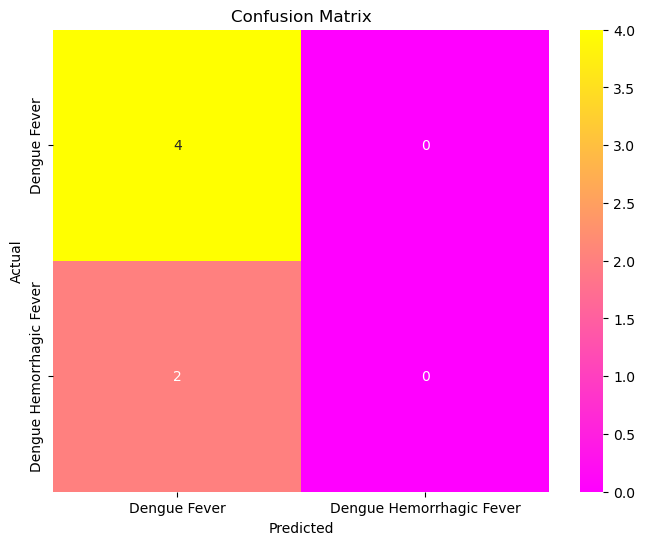

Number of genes: 29777


In [3]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from bootstrapped import bootstrap as bs
from bootstrapped import stats_functions as bs_stats


data = pd.read_csv("dengue_data.csv", index_col=0)
meta = pd.read_csv("dengue_metadata.csv")

# Merging data 
merged_data = pd.merge(meta, data.T, left_on='sample', right_index=True)

label_encoder = LabelEncoder()
merged_data['disease.state'] = label_encoder.fit_transform(merged_data['disease.state'])

# filter data for Dengue Hemorrhagic Fever and Dengue Fever only
selected_classes = [label_encoder.transform(['Dengue Hemorrhagic Fever'])[0], label_encoder.transform(['Dengue Fever'])[0]]
filtered_data = merged_data[merged_data['disease.state'].isin(selected_classes)]

# extract the features (gene expression data) and target variable (disease state)
X = filtered_data.drop(['sample', 'disease.state'], axis=1).select_dtypes(include='number')
y = filtered_data['disease.state'].map(lambda x: 1 if x == label_encoder.transform(['Dengue Hemorrhagic Fever'])[0] else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize and train the SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

# Number of bootstrap iterations (reduced to 100 for performance)
num_iterations = 100

# Initialize lists to store bootstrapped accuracy scores
bootstrap_accuracy_scores = []

# Perform bootstrapping
for _ in range(num_iterations):
    bootstrap_indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_bootstrap = X_train.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]

    # training 
    clf_bootstrap = SVC()
    clf_bootstrap.fit(X_train_bootstrap, y_train_bootstrap)

    # make predictions
    y_pred_bootstrap = clf_bootstrap.predict(X_test)

    # calculate accuracy on the test set for this bootstrap iteration
    accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)

    # store the accuracy score for this iteration
    bootstrap_accuracy_scores.append(accuracy_bootstrap)

# calculate the mean of the bootstrapping ensemble and confidence interval of accuracy scores
bootstrap_stats = bs.bootstrap(np.array(bootstrap_accuracy_scores), stat_func=bs_stats.mean, alpha=0.05)


print("Bootstrap Mean Accuracy:", bootstrap_stats.value)
print("Bootstrap 95% Confidence Interval:", (bootstrap_stats.lower_bound, bootstrap_stats.upper_bound))


class_report = classification_report(y_test, clf.predict(X_test))
print("Classification Report:\n", class_report)

# Create a confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='spring', xticklabels=['Dengue Fever', 'Dengue Hemorrhagic Fever'], yticklabels=['Dengue Fever', 'Dengue Hemorrhagic Fever'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the number of genes
num_genes = X.shape[1]
print(f"Number of genes: {num_genes}")


In [ ]:
import random

# Number of permutation iterations
num_permutations = 1000  # You can adjust this number

# Initialize a list to store permutation accuracy scores
permutation_accuracy_scores = []

# Perform permutation testing
for _ in range(num_permutations):
    # Shuffle the disease state labels (y_train) randomly
    y_train_permuted = y_train.copy().tolist()
    random.shuffle(y_train_permuted)

    # Initialize and train the SVM classifier on the permuted labels
    clf_permuted = SVC()
    clf_permuted.fit(X_train, y_train_permuted)

    # Make predictions on the test set using the classifier with permuted labels
    y_pred_permuted = clf_permuted.predict(X_test)

    # Calculate accuracy on the test set for this permutation iteration
    accuracy_permuted = accuracy_score(y_test, y_pred_permuted)

    # Store the accuracy score for this permutation iteration
    permutation_accuracy_scores.append(accuracy_permuted)

# Calculate the mean accuracy score of the permutation tests
permutation_mean_accuracy = np.mean(permutation_accuracy_scores)

# Calculate the observed accuracy score on the actual labels
observed_accuracy = accuracy_score(y_test, clf.predict(X_test))

# Calculate the p-value by comparing the observed accuracy to the distribution of permuted accuracies
p_value = (np.sum(np.array(permutation_accuracy_scores) >= observed_accuracy) + 1) / (num_permutations + 1)


print("Observed Accuracy:", observed_accuracy)
print("Permutation Mean Accuracy:", permutation_mean_accuracy)
print("P-Value:", p_value)

# Determine if the observed accuracy is statistically significant
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("The observed accuracy is statistically significant.")
else:
    print("The observed accuracy is not statistically significant.")
